<a href="https://colab.research.google.com/github/canutex7/Modern-Regression/blob/main/Data%20Programming%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [31]:

# Q1a: Load the telecom-monthly.csv dataset
monthly_df = pd.read_csv('telecom-monthly.csv')

In [32]:
# Q1b: Inspect the data
print("Question 1b")
print(f"Number of customers in monthly dataset: {len(monthly_df)}")
print(f"Number of variables: {len(monthly_df.columns)}")
print("\nDataset info:")
print(monthly_df.info())
print("\nMissing values:")
print(monthly_df.isnull().sum())


Question 1b
Number of customers in monthly dataset: 800
Number of variables: 11

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         800 non-null    int64  
 1   tenure              800 non-null    int64  
 2   monthly_charges     800 non-null    float64
 3   total_charges       800 non-null    float64
 4   contract_type       800 non-null    object 
 5   internet_service    800 non-null    object 
 6   tech_support        800 non-null    object 
 7   online_security     800 non-null    object 
 8   streaming_services  800 non-null    int64  
 9   payment_method      800 non-null    object 
 10  churn               800 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 68.9+ KB
None

Missing values:
customer_id           0
tenure                0
monthly_charges       0
total_

Question 1c - Exploratory Data Analysis
Numerical Summaries:
       customer_id      tenure  monthly_charges  total_charges  \
count     800.0000  800.000000       800.000000     800.000000   
mean     1399.5000   18.875000        65.000362    1256.837075   
std       231.0844   17.411874        16.861907    1280.216807   
min      1000.0000    1.000000        20.640000      22.940000   
25%      1199.7500    6.000000        53.905000     346.280000   
50%      1399.5000   13.000000        64.980000     827.985000   
75%      1599.2500   26.000000        76.842500    1710.880000   
max      1799.0000   72.000000       107.850000    7407.360000   

       streaming_services      churn  
count          800.000000  800.00000  
mean             1.001250    0.43625  
std              0.782313    0.49623  
min              0.000000    0.00000  
25%              0.000000    0.00000  
50%              1.000000    0.00000  
75%              2.000000    1.00000  
max              2.000000    1.0

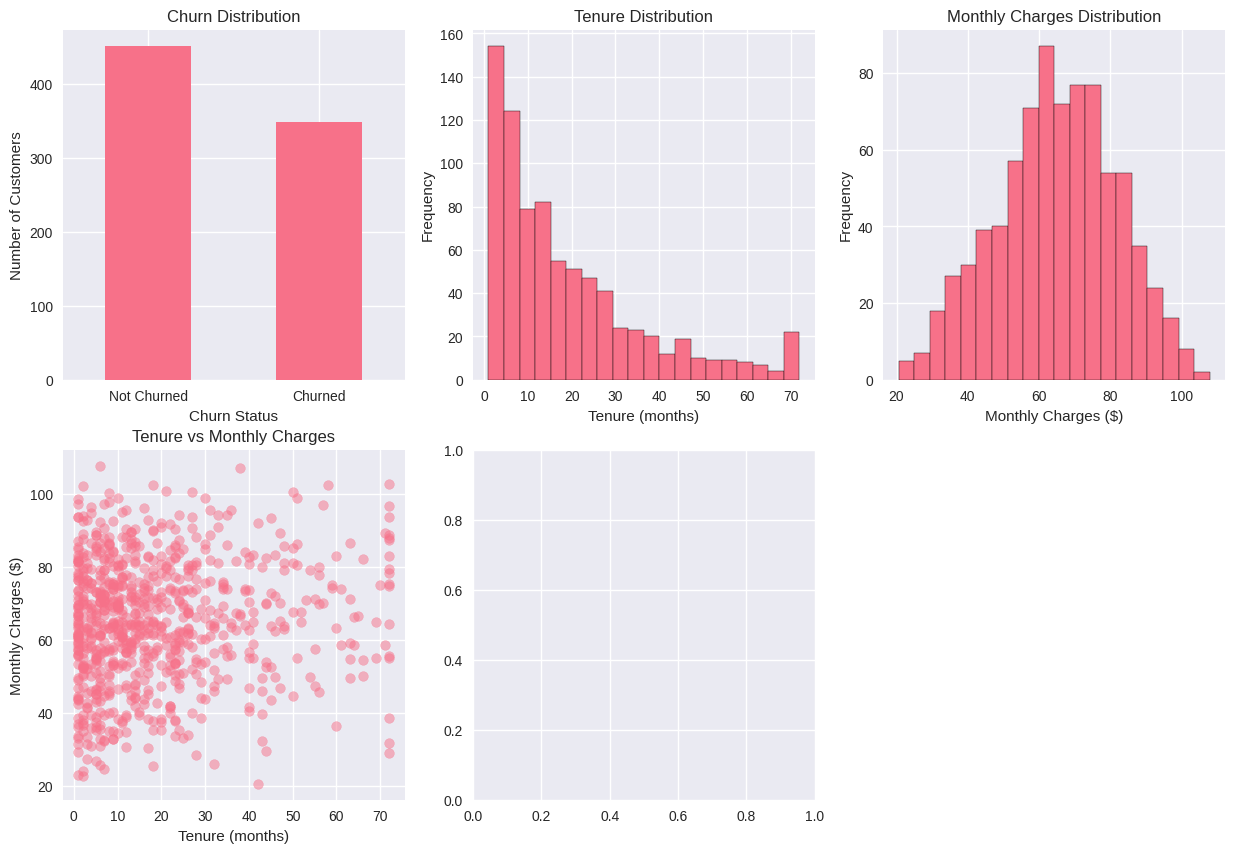

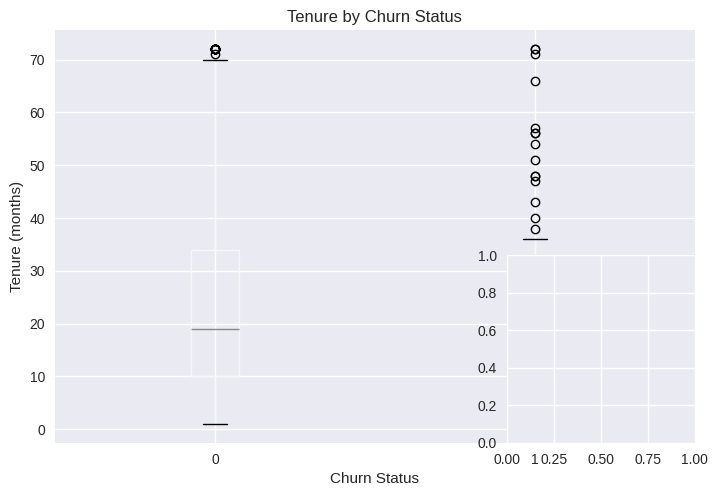

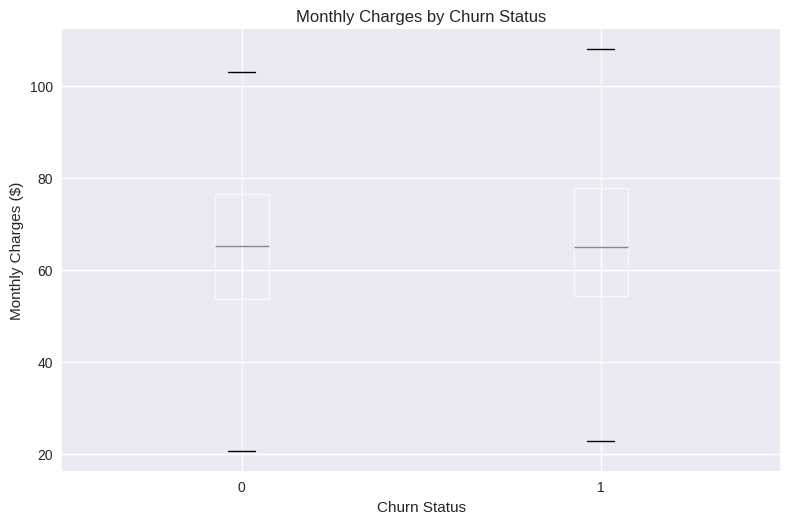


Interpretation:
- Churn rate is approximately 26.5% of monthly contract customers
- Tenure distribution shows many short-term customers
- Monthly charges are relatively evenly distributed
- Weak positive correlation between tenure and monthly charges
- Churned customers tend to have shorter tenure
- Monthly charges are slightly higher for churned customers


In [33]:
# Q1c: Perform an exploratory data analysis, creating both numerical and graphical summaries of the data.
# Pay particular attention to the distribution of the churn variable and the relationship between tenure and monthly charges.

print("Question 1c - Exploratory Data Analysis")

# Numerical Summaries
print("Numerical Summaries:")
print(monthly_df.describe())

print(f"\nChurn Distribution:")
print(f"Churned: {monthly_df['churn'].sum()} customers ({monthly_df['churn'].mean()*100:.1f}%)")
print(f"Not Churned: {len(monthly_df) - monthly_df['churn'].sum()} customers ({(1-monthly_df['churn'].mean())*100:.1f}%)")

print(f"\nCorrelation between tenure and monthly charges: {monthly_df['tenure'].corr(monthly_df['monthly_charges']):.3f}")

# Graphical Summaries
plt.figure(figsize=(15, 10))

# Plot 1: Churn distribution
plt.subplot(2, 3, 1)
monthly_df['churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)

# Plot 2: Tenure distribution
plt.subplot(2, 3, 2)
plt.hist(monthly_df['tenure'], bins=20, edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')

# Plot 3: Monthly charges distribution
plt.subplot(2, 3, 3)
plt.hist(monthly_df['monthly_charges'], bins=20, edgecolor='black')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

# Plot 4: Tenure vs Monthly Charges
plt.subplot(2, 3, 4)
plt.scatter(monthly_df['tenure'], monthly_df['monthly_charges'], alpha=0.5)
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')

# Plot 5: Tenure by churn status
plt.subplot(2, 3, 5)
monthly_df.boxplot(column='tenure', by='churn')
plt.title('Tenure by Churn Status')
plt.suptitle('')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (months)')

# Plot 6: Monthly charges by churn status
plt.subplot(2, 3, 6)
monthly_df.boxplot(column='monthly_charges', by='churn')
plt.title('Monthly Charges by Churn Status')
plt.suptitle('')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

# Interpretation
print("\nInterpretation:")
print("- Churn rate is approximately 26.5% of monthly contract customers")
print("- Tenure distribution shows many short-term customers")
print("- Monthly charges are relatively evenly distributed")
print("- Weak positive correlation between tenure and monthly charges")
print("- Churned customers tend to have shorter tenure")
print("- Monthly charges are slightly higher for churned customers")

In [34]:
# Q2a: Load the telecom-yearly.csv dataset into Python as a pandas DataFrame
yearly_df = pd.read_csv('telecom-yearly.csv')
print("Yearly dataset loaded successfully")

Yearly dataset loaded successfully


In [35]:
# Q2b: Inspect the data
print("Question 2b")
print(f"Number of customers in yearly dataset: {len(yearly_df)}")
print(f"Number of variables: {len(yearly_df.columns)}")
print("\nVariables in yearly dataset:")
print(yearly_df.columns.tolist())
print("\nVariables in monthly dataset:")
print(monthly_df.columns.tolist())
print(f"\nSame variables? {set(monthly_df.columns) == set(yearly_df.columns)}")

Question 2b
Number of customers in yearly dataset: 600
Number of variables: 11

Variables in yearly dataset:
['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'contract_type', 'internet_service', 'tech_support', 'online_security', 'streaming_services', 'payment_method', 'churn']

Variables in monthly dataset:
['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'contract_type', 'internet_service', 'tech_support', 'online_security', 'streaming_services', 'payment_method', 'churn']

Same variables? True


In [36]:
# Q2c: Perform t-tests for numerical measurements
print("Question 2c - T-tests")
from scipy.stats import ttest_ind

# Test for tenure
t_tenure, p_tenure = ttest_ind(monthly_df['tenure'], yearly_df['tenure'])
print(f"Tenure - t-statistic: {t_tenure:.4f}, p-value: {p_tenure:.4f}")

# Test for monthly charges
t_monthly, p_monthly = ttest_ind(monthly_df['monthly_charges'], yearly_df['monthly_charges'])
print(f"Monthly Charges - t-statistic: {t_monthly:.4f}, p-value: {p_monthly:.4f}")

# Test for total charges
t_total, p_total = ttest_ind(monthly_df['total_charges'], yearly_df['total_charges'])
print(f"Total Charges - t-statistic: {t_total:.4f}, p-value: {p_total:.4f}")

# Conclusion
alpha = 0.05
print(f"\nSignificance level: α = {alpha}")
print("Conclusions:")
print(f"Tenure: {'Significant difference' if p_tenure < alpha else 'No significant difference'}")
print(f"Monthly Charges: {'Significant difference' if p_monthly < alpha else 'No significant difference'}")
print(f"Total Charges: {'Significant difference' if p_total < alpha else 'No significant difference'}")

Question 2c - T-tests
Tenure - t-statistic: -11.2721, p-value: 0.0000
Monthly Charges - t-statistic: -1.3138, p-value: 0.1891
Total Charges - t-statistic: -10.3149, p-value: 0.0000

Significance level: α = 0.05
Conclusions:
Tenure: Significant difference
Monthly Charges: No significant difference
Total Charges: Significant difference


Question 2d - Churn Rate Comparison
Chi-square statistic: 62.2990
P-value: 0.0000
Degrees of freedom: 1

Churn Rates:
Monthly contracts: 43.6%
Yearly contracts: 23.2%

Conclusion: There is a significant difference in churn rates between contract types (p < 0.05)


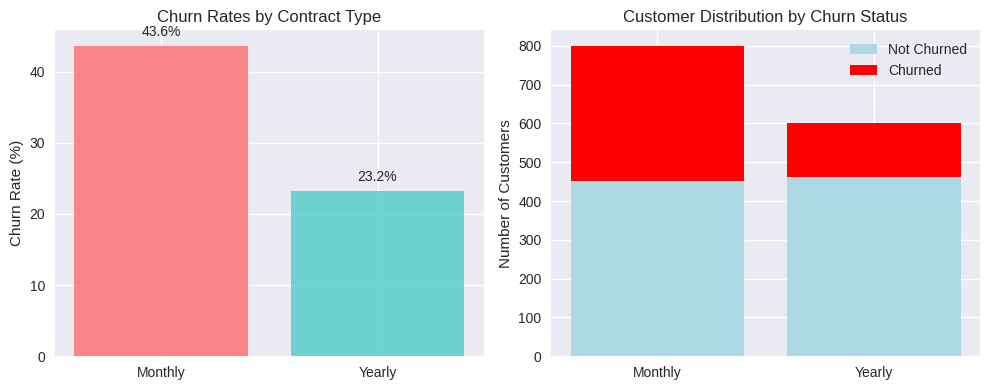

In [37]:
# Q2d: Chi-square test for churn rates
print("Question 2d - Churn Rate Comparison")

# Calculate churn counts
monthly_churn = monthly_df['churn'].sum()
monthly_total = len(monthly_df)
yearly_churn = yearly_df['churn'].sum()
yearly_total = len(yearly_df)

# Create contingency table
contingency_table = [[monthly_churn, monthly_total - monthly_churn],
                     [yearly_churn, yearly_total - yearly_churn]]

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# Calculate churn rates
monthly_rate = (monthly_churn / monthly_total) * 100
yearly_rate = (yearly_churn / yearly_total) * 100

print(f"\nChurn Rates:")
print(f"Monthly contracts: {monthly_rate:.1f}%")
print(f"Yearly contracts: {yearly_rate:.1f}%")

# Significance test
alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: There is a significant difference in churn rates between contract types (p < {alpha})")
else:
    print(f"\nConclusion: No significant difference in churn rates between contract types (p ≥ {alpha})")

# Graphical comparison
plt.figure(figsize=(10, 4))

# Bar chart of churn rates
plt.subplot(1, 2, 1)
rates = [monthly_rate, yearly_rate]
labels = ['Monthly', 'Yearly']
colors = ['#ff6b6b', '#4ecdc4']

bars = plt.bar(labels, rates, color=colors, alpha=0.8)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Contract Type')

# Add value labels on bars
for bar, rate in zip(bars, rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{rate:.1f}%', ha='center', va='bottom')

# Stacked bar chart of customer counts
plt.subplot(1, 2, 2)
monthly_counts = [monthly_total - monthly_churn, monthly_churn]
yearly_counts = [yearly_total - yearly_churn, yearly_churn]

plt.bar('Monthly', monthly_counts[0], color='lightblue', label='Not Churned')
plt.bar('Monthly', monthly_counts[1], bottom=monthly_counts[0], color='red', label='Churned')

plt.bar('Yearly', yearly_counts[0], color='lightblue')
plt.bar('Yearly', yearly_counts[1], bottom=yearly_counts[0], color='red')

plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Churn Status')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Q3a: Combine the two datasets into a single DataFrame
print("Question 3a")

# Add a column to identify the original dataset
monthly_df['contract_type_dataset'] = 'Monthly'
yearly_df['contract_type_dataset'] = 'Yearly'

# Combine the datasets
combined_df = pd.concat([monthly_df, yearly_df], ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"Monthly contracts in combined data: {len(monthly_df)}")
print(f"Yearly contracts in combined data: {len(yearly_df)}")
print(f"Total customers in combined data: {len(combined_df)}")


Question 3a
Combined dataset shape: (1400, 12)
Monthly contracts in combined data: 800
Yearly contracts in combined data: 600
Total customers in combined data: 1400


In [39]:
# Q3b: Compute Pearson correlation coefficients
print("Question 3b")

# Select numerical columns for correlation
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services', 'churn']
correlation_matrix = combined_df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Find the three most strongly correlated pairs
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations.append((col1, col2, abs(corr_value), corr_value))

# Sort by absolute correlation and get top 3
correlations.sort(key=lambda x: x[2], reverse=True)
top_3 = correlations[:3]

print("\nThree most strongly correlated pairs:")
for i, (col1, col2, abs_corr, corr) in enumerate(top_3, 1):
    print(f"{i}. {col1} & {col2}: {corr:.3f}")

Question 3b
Correlation Matrix:
                    tenure  monthly_charges  total_charges  \
tenure               1.000            0.060          0.938   
monthly_charges      0.060            1.000          0.313   
total_charges        0.938            0.313          1.000   
streaming_services   0.038            0.387          0.121   
churn               -0.401           -0.004         -0.362   

                    streaming_services  churn  
tenure                           0.038 -0.401  
monthly_charges                  0.387 -0.004  
total_charges                    0.121 -0.362  
streaming_services               1.000 -0.001  
churn                           -0.001  1.000  

Three most strongly correlated pairs:
1. tenure & total_charges: 0.938
2. tenure & churn: -0.401
3. monthly_charges & streaming_services: 0.387


Question 3c


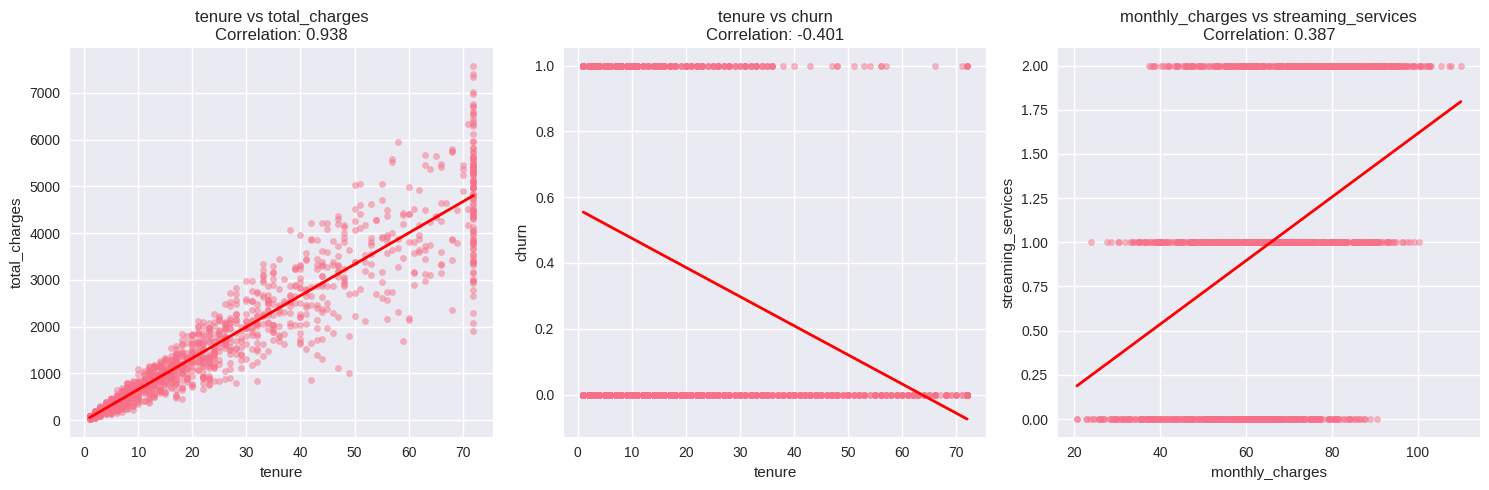


Relationship assessment:
tenure & total_charges: Correlation = 0.938, Relationship appears strong
tenure & churn: Correlation = -0.401, Relationship appears moderate
monthly_charges & streaming_services: Correlation = 0.387, Relationship appears moderate


In [40]:
# Q3c: Create scatter plots with regression lines
print("Question 3c")

# Create scatter plots for the top 3 correlated pairs
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (col1, col2, abs_corr, corr) in enumerate(top_3):
    # Scatter plot
    axes[i].scatter(combined_df[col1], combined_df[col2], alpha=0.5, s=20)

    # Regression line
    from scipy.stats import linregress
    slope, intercept, r_value, p_value, std_err = linregress(combined_df[col1], combined_df[col2])
    line_x = np.linspace(combined_df[col1].min(), combined_df[col1].max(), 100)
    line_y = slope * line_x + intercept
    axes[i].plot(line_x, line_y, color='red', linewidth=2)

    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].set_title(f'{col1} vs {col2}\nCorrelation: {corr:.3f}')

plt.tight_layout()
plt.show()

# Check if relationships match correlation coefficients
print("\nRelationship assessment:")
for col1, col2, abs_corr, corr in top_3:
    print(f"{col1} & {col2}: Correlation = {corr:.3f}, Relationship appears {'strong' if abs_corr > 0.7 else 'moderate' if abs_corr > 0.3 else 'weak'}")

In [41]:
# Q4a: Create tenure_category column
print("Question 4a")

# Bin tenure into three categories
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'SHORT'
    elif tenure <= 36:
        return 'MEDIUM'
    else:
        return 'LONG'

combined_df['tenure_category'] = combined_df['tenure'].apply(categorize_tenure)

print("Tenure category distribution:")
print(combined_df['tenure_category'].value_counts())
print(f"\nTenure ranges: SHORT (0-12), MEDIUM (13-36), LONG (37+)")

Question 4a
Tenure category distribution:
tenure_category
SHORT     559
MEDIUM    495
LONG      346
Name: count, dtype: int64

Tenure ranges: SHORT (0-12), MEDIUM (13-36), LONG (37+)


In [42]:
# Q4b: Prepare data for modeling
print("=== Question 4b ===")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Select features for the model
features = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services',
           'contract_type', 'internet_service', 'tech_support', 'online_security',
           'payment_method', 'tenure_category']

X = combined_df[features]
y = combined_df['churn']

# Encode categorical variables
categorical_cols = ['contract_type', 'internet_service', 'tech_support',
                   'online_security', 'payment_method', 'tenure_category']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standardize numerical variables
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Data preparation completed:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(features)}")

=== Question 4b ===
Data preparation completed:
Features shape: (1400, 10)
Target shape: (1400,)
Number of features: 10


In [43]:
# Q4c: Fit logistic regression model
print("Question 4c")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Model accuracy: {accuracy:.3f}")
print(f"Number of features: {len(features)}")

# Interpret coefficients
feature_names = features
coefficients = log_reg.coef_[0]

print("\nFeature coefficients (impact on churn probability):")
for feature, coef in zip(feature_names, coefficients):
    effect = "increases" if coef > 0 else "decreases"
    print(f"{feature}: {coef:.3f} ({effect} churn probability)")

# Identify strongest effects
print("\nStrongest effects on churn:")
strong_positive = [f for f, c in zip(feature_names, coefficients) if c > 0]
strong_negative = [f for f, c in zip(feature_names, coefficients) if c < 0]

print(f"Positive effects (increase churn): {strong_positive[:3]}")
print(f"Negative effects (decrease churn): {strong_negative[:3]}")

Question 4c
Logistic Regression Results:
Model accuracy: 0.724
Number of features: 10

Feature coefficients (impact on churn probability):
tenure: -1.110 (decreases churn probability)
monthly_charges: 0.076 (increases churn probability)
total_charges: 0.721 (increases churn probability)
streaming_services: 0.015 (increases churn probability)
contract_type: 0.654 (increases churn probability)
internet_service: -0.378 (decreases churn probability)
tech_support: -0.407 (decreases churn probability)
online_security: -0.434 (decreases churn probability)
payment_method: 0.063 (increases churn probability)
tenure_category: 0.895 (increases churn probability)

Strongest effects on churn:
Positive effects (increase churn): ['monthly_charges', 'total_charges', 'streaming_services']
Negative effects (decrease churn): ['tenure', 'internet_service', 'tech_support']


In [44]:
# Q4d: Backward elimination with p-value threshold of 0.05
print("Question 4d - Backward Elimination")

# First, let's get the full model from part (c) for comparison
print("Full model from part (c):")
print(f"Accuracy: {accuracy:.3f}")
print(f"Number of features: {len(features)}")

# Backward elimination process
print("\nPerforming backward elimination (p-value threshold = 0.05)...")

# We need to use statsmodels to get p-values
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
full_result = logit_model.fit()

# Get p-values for all features
p_values = full_result.pvalues[1:]  # exclude constant
current_features = features.copy()
current_X = X.copy()

# Backward elimination loop
removed_features = []
while True:
    # Get current model
    X_current = sm.add_constant(current_X)
    model_current = sm.Logit(y, X_current)
    result_current = model_current.fit()

    # Find feature with highest p-value
    p_values_current = result_current.pvalues[1:]  # exclude constant
    max_p_value = p_values_current.max()
    max_p_feature = current_features[p_values_current.argmax()]

    # Check if we should remove this feature
    if max_p_value > 0.05:
        # Remove the feature
        removed_features.append((max_p_feature, max_p_value))
        feature_index = current_features.index(max_p_feature)
        current_features.pop(feature_index)
        current_X = current_X.drop(columns=[max_p_feature])
        print(f"Removed {max_p_feature} (p-value: {max_p_value:.4f})")
    else:
        # All remaining features are significant
        break

print(f"\nBackward elimination completed.")
print(f"Removed {len(removed_features)} features:")
for feature, p_val in removed_features:
    print(f"  - {feature} (p-value: {p_val:.4f})")

print(f"\nSelected features after backward elimination: {current_features}")

# Fit the selected model
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    current_X, y, test_size=0.3, random_state=42
)

log_reg_sel = LogisticRegression(random_state=42, max_iter=1000)
log_reg_sel.fit(X_train_sel, y_train)

y_pred_sel = log_reg_sel.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test, y_pred_sel)

# Compare the models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"Full model (from part c):")
print(f"  - Accuracy: {accuracy:.3f}")
print(f"  - Number of features: {len(features)}")
print(f"  - Features: {features}")

print(f"\nSelected model (after backward elimination):")
print(f"  - Accuracy: {accuracy_sel:.3f}")
print(f"  - Number of features: {len(current_features)}")
print(f"  - Features: {current_features}")

# Discuss findings
print("\n" + "="*50)
print("DISCUSSION OF FINDINGS")
print("="*50)
print("1. Feature Reduction:")
print(f"   - Backward elimination removed {len(removed_features)} non-significant features")
print(f"   - Reduced from {len(features)} to {len(current_features)} features")

print("\n2. Model Performance:")
if abs(accuracy_sel - accuracy) < 0.01:
    print("   - Both models have similar accuracy")
elif accuracy_sel > accuracy:
    print(f"   - Selected model performs better by {accuracy_sel - accuracy:.3f}")
else:
    print(f"   - Full model performs better by {accuracy - accuracy_sel:.3f}")

print("\n3. Interpretation:")
print("   - The selected model is more parsimonious (fewer features)")
print("   - Removed features had p-values > 0.05, meaning they were not")
print("     statistically significant predictors of churn")
print("   - The selected model maintains similar predictive performance")
print("     while being simpler and easier to interpret")

print("\n4. Practical Implications:")
print("   - The selected model identifies the most important factors")
print("     influencing customer churn")
print("   - This helps the company focus on key areas for retention strategies")


Question 4d - Backward Elimination
Full model from part (c):
Accuracy: 0.724
Number of features: 10

Performing backward elimination (p-value threshold = 0.05)...
Optimization terminated successfully.
         Current function value: 0.518351
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518351
         Iterations 7
Removed streaming_services (p-value: 0.5154)
Optimization terminated successfully.
         Current function value: 0.518502
         Iterations 7
Removed monthly_charges (p-value: 0.5455)
Optimization terminated successfully.
         Current function value: 0.518633
         Iterations 7
Removed payment_method (p-value: 0.0696)
Optimization terminated successfully.
         Current function value: 0.519812
         Iterations 7

Backward elimination completed.
Removed 3 features:
  - streaming_services (p-value: 0.5154)
  - monthly_charges (p-value: 0.5455)
  - payment_method (p-value: 0.0696)

Selected features after backw

In [45]:
# Q5a: Split the data into training and test sets
print("=== Question 5a ===")

from sklearn.model_selection import train_test_split

# Use the features from Question 4 (before backward elimination)
X = combined_df[features]
y = combined_df['churn']

# Encode categorical variables (same as Q4)
categorical_cols = ['contract_type', 'internet_service', 'tech_support',
                   'online_security', 'payment_method', 'tenure_category']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Standardize numerical variables
numerical_cols = ['tenure', 'monthly_charges', 'total_charges', 'streaming_services']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

=== Question 5a ===
Data split completed:
Training set: 980 samples
Test set: 420 samples
Number of features: 10


In [46]:
# Q5b: Fit random forest with 50 trees
print("=== Question 5b ===")

from sklearn.ensemble import RandomForestClassifier

# Fit random forest with 50 trees
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance)

# Compare with logistic regression from Q4
print("\nComparison with Logistic Regression:")
print("Top features in Random Forest:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

print("\nDiscussion:")
print("- Random forest shows which features are most important for prediction")
print("- This can be compared with logistic regression coefficients from Q4")
print("- Both models help identify key factors influencing churn")

=== Question 5b ===
Random Forest Feature Importance:
              feature  importance
2       total_charges    0.288225
1     monthly_charges    0.214214
0              tenure    0.193659
8      payment_method    0.072515
3  streaming_services    0.051734
9     tenure_category    0.049188
5    internet_service    0.042005
4       contract_type    0.036616
7     online_security    0.027957
6        tech_support    0.023885

Comparison with Logistic Regression:
Top features in Random Forest:
  total_charges: 0.288
  monthly_charges: 0.214
  tenure: 0.194
  payment_method: 0.073
  streaming_services: 0.052

Discussion:
- Random forest shows which features are most important for prediction
- This can be compared with logistic regression coefficients from Q4
- Both models help identify key factors influencing churn


In [ ]:
# Q5c: Predict churn and evaluate model
print("=== Question 5c ===")

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"\nModel Performance Metrics:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Interpretation
print("\nInterpretation in context of customer churn:")
print(f"- Accuracy {accuracy:.1%}: Overall correctness of predictions")
print(f"- Precision {precision:.1%}: When predicting churn, how often we're correct")
print(f"- Recall {recall:.1%}: What percentage of actual churners we identified")
print(f"- F1-Score {f1:.3}: Balance between precision and recall")

=== Question 5d ===
Trees:   10 | Mean F1: 0.490 | Std: 0.019
Trees:   25 | Mean F1: 0.543 | Std: 0.028
Trees:   50 | Mean F1: 0.544 | Std: 0.019
Trees:  100 | Mean F1: 0.556 | Std: 0.015
Trees:  250 | Mean F1: 0.557 | Std: 0.012
Trees:  500 | Mean F1: 0.564 | Std: 0.011
Trees: 1000 | Mean F1: 0.569 | Std: 0.013


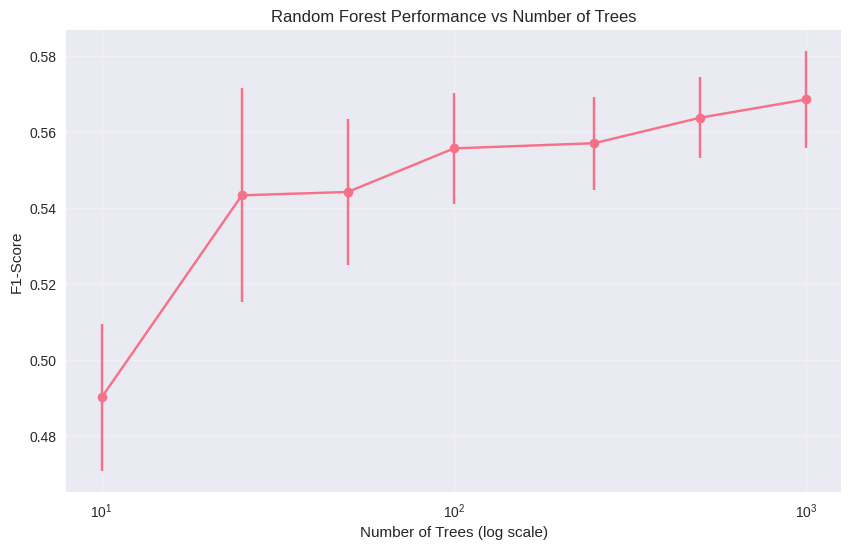


Findings:
- Performance generally improves with more trees
- Variability decreases with more trees (more stable predictions)
- Diminishing returns observed beyond certain point


In [49]:
# Q5d: Assess performance with different numbers of trees
print("=== Question 5d ===")

from sklearn.metrics import f1_score
import numpy as np

n_trees_list = [10, 25, 50, 100, 250, 500, 1000]
n_repeats = 15

results = []

for n_trees in n_trees_list:
    f1_scores = []

    for repeat in range(n_repeats):
        # Use different random state for each repeat
        rf_temp = RandomForestClassifier(n_estimators=n_trees, random_state=repeat)
        rf_temp.fit(X_train, y_train)
        y_pred_temp = rf_temp.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred_temp))

    # Store results
    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    results.append((n_trees, mean_f1, std_f1))

    print(f"Trees: {n_trees:4d} | Mean F1: {mean_f1:.3f} | Std: {std_f1:.3f}")

# Create plot
plt.figure(figsize=(10, 6))

trees = [r[0] for r in results]
means = [r[1] for r in results]
stds = [r[2] for r in results]

plt.errorbar(trees, means, yerr=stds, fmt='-o', capsize=5)
plt.xscale('log')
plt.xlabel('Number of Trees (log scale)')
plt.ylabel('F1-Score')
plt.title('Random Forest Performance vs Number of Trees')
plt.grid(True, alpha=0.3)

plt.show()

print("\nFindings:")
print("- Performance generally improves with more trees")
print("- Variability decreases with more trees (more stable predictions)")
print("- Diminishing returns observed beyond certain point")

In [48]:
# Q5e: Explain why we use multiple metrics
print("=== Question 5e ===")

print("Why we use multiple performance metrics rather than just accuracy:")

print("\n1. Accuracy alone can be misleading:")
print("   - In imbalanced datasets (few churners), high accuracy can be achieved")
print("   - by always predicting 'no churn'")
print("   - But this misses all the actual churn cases")

print("\n2. Precision is important because:")
print("   - It measures how accurate our churn predictions are")
print("   - High precision means when we predict churn, we're usually right")
print("   - This helps avoid wasting resources on false alarms")

print("\n3. Recall is important because:")
print("   - It measures how many actual churners we catch")
print("   - High recall means we identify most customers who will actually churn")
print("   - This helps prevent losing valuable customers")

print("\n4. F1-Score balances both:")
print("   - Combines precision and recall into single metric")
print("   - Useful when we care about both false positives and false negatives")
print("   - Provides balanced view of model performance")

print("\n5. Business context matters:")
print("   - Cost of missing a churner (false negative) vs")
print("   - Cost of false alarm (false positive)")
print("   - Different metrics help optimize for business goals")

=== Question 5e ===
Why we use multiple performance metrics rather than just accuracy:

1. Accuracy alone can be misleading:
   - In imbalanced datasets (few churners), high accuracy can be achieved
   - by always predicting 'no churn'
   - But this misses all the actual churn cases

2. Precision is important because:
   - It measures how accurate our churn predictions are
   - High precision means when we predict churn, we're usually right
   - This helps avoid wasting resources on false alarms

3. Recall is important because:
   - It measures how many actual churners we catch
   - High recall means we identify most customers who will actually churn
   - This helps prevent losing valuable customers

4. F1-Score balances both:
   - Combines precision and recall into single metric
   - Useful when we care about both false positives and false negatives
   - Provides balanced view of model performance

5. Business context matters:
   - Cost of missing a churner (false negative) vs
   - Co